#### Get Dataset from Simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco_viewer
import cv2,os

import sys
sys.path.append('../../')
from models.utils.util import  *
from models.env.manipulator_agent import ManipulatorAgent

In [2]:
xml_path = '../../asset/ur5e/scene-w-ground-refreshments.xml'
MODE = 'window' ################### 'window' or 'offscreen'
env = ManipulatorAgent(rel_xml_path=xml_path,VERBOSE=False, MODE=MODE)
env.close_viewer()

MODE: window


In [11]:
# Place objects
obj_ycb_names = [body_name for body_name in env.body_names
             if body_name is not None and (body_name.startswith("ycb"))]
n_obj = 9 # len(obj_names)
xyzs = sample_xyzs(
    n_sample=n_obj*2,x_range=[0.525,1.15],y_range=[-0.38,0.38],z_range=[0.74,0.85],min_dist=0.2,xy_margin=0.1)
for obj_idx, obj_box_name in zip(range(n_obj), obj_ycb_names):
    color_idx = obj_idx % 3
    box_jntadr = env.model.body(obj_box_name).jntadr[0]
    env.model.joint(box_jntadr).qpos0[:3] = xyzs[obj_idx, :]

# Move tables and robot base
env.model.body('base_table').pos = np.array([0,0,0.395])
env.model.body('front_object_table').pos = np.array([-38+0.6,-80,0])
env.model.body('side_object_table').pos = np.array([0.38+0.4,0,0])
env.model.body('ur_base').pos = np.array([0.18,0,0.79])
env.model.body('ur_base').pos = np.array([0.18,0,0.8]) # robot base
for body_name in ['base_table','front_object_table','side_object_table']:
    geomadr = env.model.body(body_name).geomadr[0]
    env.model.geom(geomadr).rgba[3] = 1.0

# Fruits
env.model.joint(env.model.body('ycb-apple').jntadr[0]).qpos0[:3] = np.array([0.55, 0.15, 0.8])
env.model.joint(env.model.body('ycb-lemon').jntadr[0]).qpos0[:3] = np.array([0.55, 0.19, 0.8])

# Beverages
env.model.joint(env.model.body('coke').jntadr[0]).qpos0[:3] = np.array([0.7, -0.25, 0.8])
env.model.joint(env.model.body('monster_yellow').jntadr[0]).qpos0[:3] = np.array([0.7, -0.18, 0.9])

# Snacks
# env.model.joint(env.model.body('kitkat_flat').jntadr[0]).qpos0[:3] = np.array([1.0, 0.2, 0.9])
# env.model.joint(env.model.body('kitkat_box').jntadr[0]).qpos0[:3] = np.array([1.0, 0.0, 0.9])
# env.model.joint(env.model.body('pocky').jntadr[0]).qpos0[:3] = np.array([1.0, -0.2, 0.9])

# Snacks
env.model.joint(env.model.body('kitkat_box').jntadr[0]).qpos0[:3] = np.array([0.9, 0.25, 0.9])
env.model.joint(env.model.body('pocky').jntadr[0]).qpos0[:3] = np.array([0.92, 0.125, 0.9])

# ############# Preference #############
# # Fruits
# env.model.joint(env.model.body('ycb-apple').jntadr[0]).qpos0[:3] = np.array([0.7, 0.275, 0.8])
# env.model.joint(env.model.body('ycb-lemon').jntadr[0]).qpos0[:3] = np.array([0.65, 0.275, 0.8])

# # Beverages
# env.model.joint(env.model.body('coke').jntadr[0]).qpos0[:3] = np.array([0.80, -0.25, 0.8])
# env.model.joint(env.model.body('monster_yellow').jntadr[0]).qpos0[:3] = np.array([0.75, -0.28, 0.8])

# # Snacks
# env.model.joint(env.model.body('kitkat_flat').jntadr[0]).qpos0[:3] = np.array([0.85, 0.125, 0.9])
# env.model.joint(env.model.body('kitkat_flat').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([-90, 0, 180])))
# env.model.joint(env.model.body('kitkat_box').jntadr[0]).qpos0[:3] = np.array([0.99, 0.0, 0.9])
# env.model.joint(env.model.body('kitkat_box').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([0, 0, 180])))
# env.model.joint(env.model.body('pocky').jntadr[0]).qpos0[:3] = np.array([0.92, -0.175, 0.9])
# env.model.joint(env.model.body('pocky').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([90, 0, 180])))

print ("Ready.")

[sample_xyzs] iter_tick:[1001] is over 1000.
[sample_xyzs] iter_tick:[1002] is over 1000.
[sample_xyzs] iter_tick:[1003] is over 1000.
[sample_xyzs] iter_tick:[1004] is over 1000.
[sample_xyzs] iter_tick:[1005] is over 1000.
[sample_xyzs] iter_tick:[1006] is over 1000.
[sample_xyzs] iter_tick:[1007] is over 1000.
[sample_xyzs] iter_tick:[1008] is over 1000.
[sample_xyzs] iter_tick:[1009] is over 1000.
[sample_xyzs] iter_tick:[1010] is over 1000.
[sample_xyzs] iter_tick:[1011] is over 1000.
Ready.


In [13]:
# xyzs = sample_xyzs(
#     n_sample=n_obj*2,x_range=[0.525,1.15],y_range=[-0.38,0.38],z_range=[0.74,0.85],min_dist=0.2,xy_margin=0.1)
# for obj_idx, obj_box_name in zip(range(n_obj), obj_ycb_names):
#     box_jntadr = env.model.body(obj_box_name).jntadr[0]
#     env.model.joint(box_jntadr).qpos0[:3] = xyzs[obj_idx, :]

# Joint indices
rev_joint_names = ['shoulder_pan_joint','shoulder_lift_joint','elbow_joint',
                   'wrist_1_joint','wrist_2_joint','wrist_3_joint']
idxs_ur_fwd = env.get_idxs_fwd(joint_names=rev_joint_names)
idxs_ur_jac = env.get_idxs_jac(joint_names=rev_joint_names)
idxs_ur_step = env.get_idxs_step(joint_names=rev_joint_names)

env.set_viewer()
# env.set_viewer()
env.init_viewer(viewer_title='UR5e with RG2',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True, MODE='window', VERBOSE=True)
env.close_viewer()
env.init_viewer(viewer_title='UR5e with RG2',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True, MODE='window', VERBOSE=True)
env.update_viewer(azimuth=0,distance=0.5,elevation=-45,lookat=[0.6,0.0,0.9],
                VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                VIS_JOINT=False,jointlength=0.5,jointwidth=0.1,
                jointrgba=[0.2,0.6,0.8,0.6])
env.reset()

# init_pose = np.array([np.deg2rad(-90), np.deg2rad(-132.46), np.deg2rad(122.85), np.deg2rad(99.65), np.deg2rad(45), np.deg2rad(-90.02)])
init_pose = np.array([-1.571, -2.1916,  1.7089,  2.0533,  1.1000, -1.5706])
init_pose = np.array([ 1.20694521, -2.30252481,  1.76063844,  1.76839491,  2.31034124, 1.07353938])
env.forward(q=init_pose,joint_idxs=idxs_ur_fwd)

FIRST_FLAG = True
while env.is_viewer_alive():
    # Step
    env.step(ctrl=np.append(init_pose,1.0),ctrl_idxs=idxs_ur_step+[6])
    
    # Render
    if env.loop_every(HZ=20) or FIRST_FLAG and MODE == 'window':
        # Get camera observation
        # p_cam,R_cam = env.get_pR_body(body_name='ur_camera_center')
        # p_ego  = p_cam
        # p_trgt = p_cam + R_cam[:,2]
        # rgb_img,depth_img,pcd,xyz_img,xyz_img_world = env.get_egocentric_rgb_depth_pcd(
        #     p_ego=p_ego,p_trgt=p_trgt,rsz_rate=10,fovy=45,BACKUP_AND_RESTORE_VIEW=True)
        # for p in pcd: env.plot_sphere(p=p,r=0.005,rgba=[0.95,0.05,0.05,1])
        env.render(render_every=1)
    elif env.loop_every(HZ=20) or FIRST_FLAG and MODE == 'offscreen':
        # Get camera observation
        # p_cam,R_cam = env.get_pR_body(body_name='ur_camera_center')
        # p_ego  = p_cam
        # p_trgt = p_cam + R_cam[:,2]
        # rgb_img,depth_img,pcd,xyz_img,xyz_img_world = env.get_egocentric_rgb_depth_pcd_offscreen(
        #     p_ego=p_ego,p_trgt=p_trgt,rsz_rate=10,fovy=45,BACKUP_AND_RESTORE_VIEW=True)
        # for p in pcd: env.plot_sphere(p=p,r=0.005,rgba=[0.95,0.05,0.05,1])
        env.render(render_every=1)
    # scene_img,rgb_img,depth_img = env.get_image_both_mode(body_name='ur_camera_center')
    # break    
    # # Plot world view and egocentric RGB and depth images
    # if env.loop_every(HZ=1) and env.get_sim_time() <= 3.0 and MODE == 'window':
    #     fig,axs = plt.subplots(1,3,figsize=(15,2))
    #     scene_img = env.grab_image()
    #     axs[0].imshow(scene_img); axs[1].imshow(rgb_img); axs[2].imshow(depth_img)
    #     fig.suptitle('tick:[%d] time:[%.2f]sec'%(env.tick,env.get_sim_time()),fontsize=9)
    #     plt.subplots_adjust(wspace=0.2); plt.show()
    # elif env.loop_every(HZ=1) and env.get_sim_time() <= 3.0 and MODE == 'offscreen':
    #     fig,axs = plt.subplots(1,3,figsize=(10,2))
    #     scene_img,scene_depth_img = env.grab_rgb_depth_img_offscreen()
    #     axs[0].imshow(scene_img); axs[1].imshow(rgb_img); axs[2].imshow(depth_img)
    #     fig.suptitle('tick:[%d] time:[%.2f]sec'%(env.tick,env.get_sim_time()),fontsize=9)
    #     plt.subplots_adjust(wspace=0.2); plt.show()
    #     break

    # Clear flag
    FIRST_FLAG = False
env.close_viewer()
print ("Done.")

MODE: window
MODE: window
MODE: window
MODE: window
Pressed ESC
Quitting.
Done.


In [62]:
plt.imsave('./refreshments/scene_img.png',scene_img)

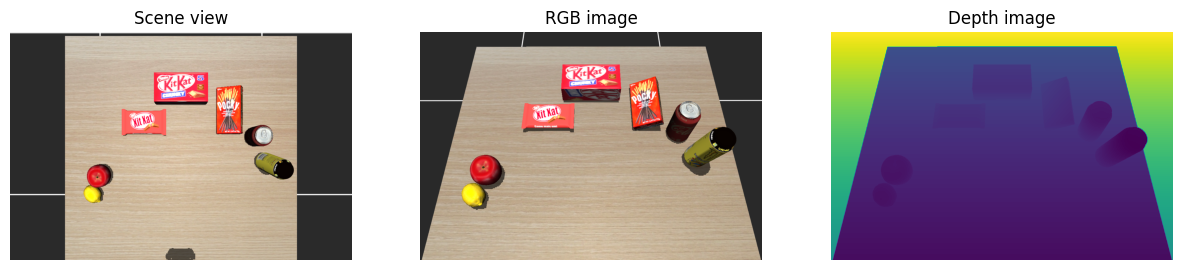

In [63]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.imshow(scene_img)
plt.title('Scene view')
plt.axis('off')
# plt.show()

plt.subplot(1,3,2)
plt.imshow(rgb_img)
plt.title('RGB image')
plt.axis('off')
# plt.show()

plt.subplot(1,3,3)
plt.imshow(depth_img)
plt.title('Depth image')
plt.axis('off')
plt.show()

In [64]:
# save image
plt.imsave('./refreshments//scene_img.png',scene_img)
plt.imsave('./refreshments/rgb_img.png',rgb_img)
plt.imsave('./refreshments/depth_img.png',depth_img.astype(np.float32))


In [10]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco_viewer
import os
import sys
import cv2
import openai

import sys
sys.path.append('../')
from models.utils.util import  *
from models.env.manipulator_agent import ManipulatorAgent
from models.utils.gpt_helper import GPT4VisionClass,set_openai_api_key_from_txt,printmd, response_to_json, parse_and_get_action
print ("openai version:[%s]"%(openai.__version__))
print ("mujoco version:[%s]"%(mujoco.__version__))


openai version:[1.3.8]
mujoco version:[3.1.0]


In [11]:
# 1. Start with Image description
model = GPT4VisionClass(key_path='../../key/rilab_key.txt', max_tokens=2056, temperature=0.9,
    gpt_model="gpt-4-vision-preview",
    role_msg="You are a helpful agent with vision capabilities; do not respond to objects not depicted in images."
    )

# 2. System prompt: functions, object_names
print("\033[94m [System prompt: infrom the format of the answer] \033[0m")


key_path:[../../key/rilab_key.txt]

Chat agent using  initialized with the follow role:[You are a helpful agent with vision capabilities; do not 
respond to objects not depicted in images.]

 [System prompt: infrom the format of the answer] 


DETAIL: high

[1/1] Image provided: [Original]: (800, 1200, 3), [Downsize]: (512, 341)

[VISUALIZE]

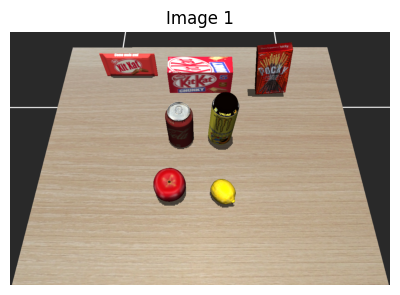

In [12]:
system_prompt ="""
You need to generate the scene graph for the following image.
e.g., 
Node: 1. [object id]
        - attribute: <color>, <shape>, <brand_name>
      2. [object id]
        - attribute: <color>, <shape>
Edge: 1. [obj 1] is [{spatial relationship 1}, {spatial relationship 2}] of [obj 2]

note: spatial relationship can be one of the following
left, right, on top of, below, in front of, behind
Try to list up all the relationships between the objects.
Brand name should be a proper noun.
The object id is a number written on the object.
"""
model.set_common_prompt(system_prompt)

query_text = """
Explain all of the objects in the image in the format of scene description.
Specify the brand name for cylindrical objects.
"""

response_interaction = model.chat(query_text=query_text, image_paths=None, images=[rgb_img],
                            PRINT_USER_MSG=True,
                            PRINT_GPT_OUTPUT=True,
                            RESET_CHAT=False,
                            RETURN_RESPONSE=True,
                            VISUALIZE=True,
                            DETAIL='high',
                            CROP=None)
response_interaction_json, error_message = response_to_json(response_interaction)